# _COMO O ACESSO A ESCOLARIDADE INFLUENCIA O INDIVÍDUO A MANTER-SE CONECTADO?_

__Bibliotecas importadas:__

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from math import *
from scipy import stats

__Checando o diretório:__

In [2]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/home/pedro/Documents/Insper/2DP/Dados/Projeto 1/DS18/PNAD 2011


__Lendo o arquivo PES:__

In [3]:
dados = pd.read_csv('../../Excels/PNAD2011/PES2011.csv')

In [4]:
dados2 = pd.read_csv('../../Excels/PNAD2015/PES2015.csv')

Selecionando colunas:

In [5]:
dados = dados.loc[:, ['V9532', 'V4801', 'V06111', 'V06112']]
dados.tail()

,V9532,V4801,V06111,V06112
358914,NaN,15.0,NaN,NaN
358915,7000.0,NaN,1.0,1.0
358916,3500.0,NaN,1.0,1.0
358917,NaN,22.0,1.0,1.0
358918,NaN,13.0,NaN,NaN


In [6]:
dados2 = dados2.loc[:, ['V9532', 'V4801', 'V06111', 'V06112']]
dados2.tail()

,V9532,V4801,V06111,V06112
356899,900.0,NaN,1.0,1.0
356900,NaN,NaN,1.0,1.0
356901,300.0,22.0,1.0,1.0
356902,NaN,22.0,1.0,1.0
356903,NaN,12.0,NaN,NaN


__Removendo outliers da coluna Renda__

In [7]:
dados.V9532.loc[(dados.V9532 >= 50000)] = 0
dados.V9532.describe()

count    157339.000000
mean       1233.785705
std        1836.310814
min           0.000000
25%         545.000000
50%         750.000000
75%        1200.000000
max       45000.000000
Name: V9532, dtype: float64

In [8]:
dados2.V9532.loc[(dados2.V9532 >= 50000)] = 0
dados2.V9532.describe()

count    154385.000000
mean       1739.271639
std        2343.531583
min           0.000000
25%         788.000000
50%        1100.000000
75%        1900.000000
max       48000.000000
Name: V9532, dtype: float64

#  __Para escolaridade:__

__Escolaridade é a variável categórica ordinal com maior número de categorias. 
Várias células serão utilizadas em sequência.__

In [9]:
dados.V4801.loc[(dados.V4801 == 1) | (dados.V4801 == 2)] = 'Em alfabetização'

In [10]:
dados.V4801.loc[(dados.V4801 == 3) | (dados.V4801 == 21)] = 'Jovens e Adultos em alfabetização ou cursando Ensino Fundamental'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
dados.V4801.loc[(dados.V4801 == 23)] = 'Jovens e Adultos cursando Ensino Médio'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
dados.V4801.loc[(dados.V4801 == 4) | (dados.V4801 == 5) | (dados.V4801 == 6) | (dados.V4801 == 7) | (dados.V4801 == 12) | (dados.V4801 == 13) | (dados.V4801 == 14) | (dados.V4801 == 15)] = 'Ensino Fundamental I em tempo regular'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
dados.V4801.loc[(dados.V4801 == 8) | (dados.V4801 == 9) | (dados.V4801 == 10) | (dados.V4801 == 11) | (dados.V4801 == 16) | (dados.V4801 == 17) | (dados.V4801 == 18) | (dados.V4801 == 19) | (dados.V4801 == 20)] = 'Ensino Fundamental I em tempo regular'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
dados.V4801.loc[(dados.V4801 == 22)] = 'Ensino Médio em tempo regular'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
dados.V4801.loc[(dados.V4801 == 24)] = 'Pré-Vestibulando'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
dados.V4801.loc[(dados.V4801 == 25)] = 'Ensino Superior, Mestrando ou Doutorando'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Agora para 2015:

In [17]:
dados2.V4801.loc[(dados2.V4801 == 1) | (dados2.V4801 == 2)] = 'Em alfabetização'

In [18]:
dados2.V4801.loc[(dados2.V4801 == 3) | (dados2.V4801 == 21)] = 'Jovens e Adultos em alfabetização ou cursando Ensino Fundamental'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
dados2.V4801.loc[(dados2.V4801 == 23)] = 'Jovens e Adultos cursando Ensino Médio'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
dados2.V4801.loc[(dados2.V4801 == 4) | (dados2.V4801 == 5) | (dados2.V4801 == 6) | (dados2.V4801 == 7) | (dados2.V4801 == 12) | (dados2.V4801 == 13) | (dados2.V4801 == 14) | (dados2.V4801 == 15)] = 'Ensino Fundamental I em tempo regular'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
dados2.V4801.loc[(dados2.V4801 == 8) | (dados2.V4801 == 9) | (dados2.V4801 == 10) | (dados2.V4801 == 11) | (dados2.V4801 == 16) | (dados2.V4801 == 17) | (dados2.V4801 == 18) | (dados2.V4801 == 19) | (dados2.V4801 == 20)] = 'Ensino Fundamental I em tempo regular'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
dados2.V4801.loc[(dados2.V4801 == 22)] = 'Ensino Médio em tempo regular'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
dados2.V4801.loc[(dados2.V4801 == 24)] = 'Pré-Vestibulando'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
dados2.V4801.loc[(dados2.V4801 == 25)] = 'Ensino Superior, Mestrando ou Doutorando'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


__Tratando NaN usando o método__ `.fillna()`

In [25]:
dados.V4801 = dados.V4801.fillna(value = 'Não Informado')
dados2.V4801 = dados2.V4801.fillna(value = 'Não Informado')

__Checando resultados:__

In [26]:
dados.head()

,V9532,V4801,V06111,V06112
0,0.0,Não Informado,3.0,1.0
1,NaN,"Ensino Superior, Mestrando ou Doutorando",1.0,1.0
2,NaN,Ensino Médio em tempo regular,1.0,3.0
3,NaN,Ensino Fundamental I em tempo regular,NaN,NaN
4,2800.0,Não Informado,3.0,1.0


In [27]:
dados2.head()

,V9532,V4801,V06111,V06112
0,800.0,Não Informado,1.0,1.0
1,1150.0,Não Informado,1.0,1.0
2,880.0,"Ensino Superior, Mestrando ou Doutorando",1.0,1.0
3,3000.0,Não Informado,1.0,1.0
4,NaN,Ensino Fundamental I em tempo regular,1.0,1.0


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


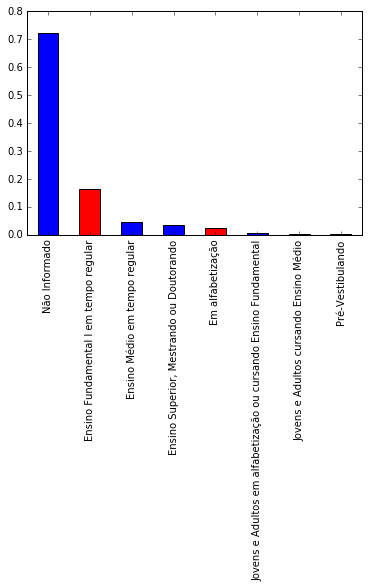

In [28]:
a = dados.V4801.value_counts(normalize = 1)
a.plot(kind='bar', color=('blue', 'red'), legend=False)

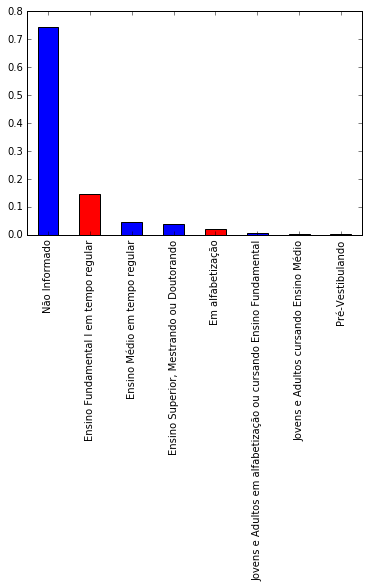

In [29]:
b = dados2.V4801.value_counts(normalize = 1)
b.plot(kind='bar', color=('blue', 'red'), legend=False)

# __Para Internet__:

__Atribuindo valores categóricos:__

In [30]:
dados.V06111.loc[(dados.V06111 == 1)] = 'Sim'
dados.V06111.loc[(dados.V06111 == 3)] = 'Não'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Agora para 2015

In [31]:
dados2.V06111.loc[(dados2.V06111 == 1)] = 'Sim'
dados2.V06111.loc[(dados2.V06111 == 3)] = 'Não'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


__Tratando NaN usando o método__ `.fillna()`

In [32]:
dados.V06111 = dados.V06111.fillna(value = 'Não Informado')

In [33]:
dados2.V06111 = dados2.V06111.fillna(value = 'Não Informado')

__Checando resultados:__

In [34]:
dados.head()

,V9532,V4801,V06111,V06112
0,0.0,Não Informado,Não,1.0
1,NaN,"Ensino Superior, Mestrando ou Doutorando",Sim,1.0
2,NaN,Ensino Médio em tempo regular,Sim,3.0
3,NaN,Ensino Fundamental I em tempo regular,Não Informado,NaN
4,2800.0,Não Informado,Não,1.0


In [35]:
dados2.head()

,V9532,V4801,V06111,V06112
0,800.0,Não Informado,Sim,1.0
1,1150.0,Não Informado,Sim,1.0
2,880.0,"Ensino Superior, Mestrando ou Doutorando",Sim,1.0
3,3000.0,Não Informado,Sim,1.0
4,NaN,Ensino Fundamental I em tempo regular,Sim,1.0


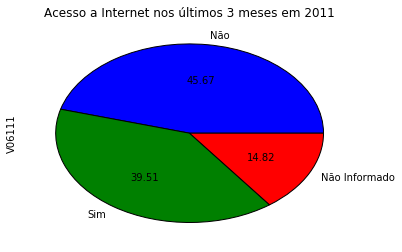

In [36]:
c = dados.V06111.value_counts(normalize = 1)
c.plot(kind='pie', autopct="%0.2f")
plt.title('Acesso a Internet nos últimos 3 meses em 2011')

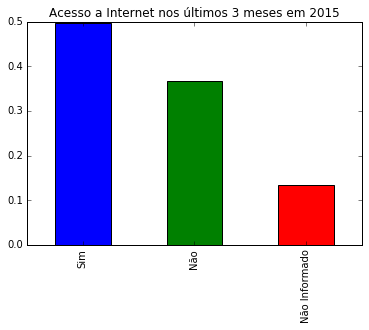

In [39]:
d = dados2.V06111.value_counts(normalize = 1)
d.plot(kind='bar')
#plt.xlim([0,1])
plt.title('Acesso a Internet nos últimos 3 meses em 2015')
#, autopct="%0.2f"

# __Para celular pessoal:__

__Atribuindo valores categóricos:__

In [40]:
dados.V06112.loc[(dados.V06112 == 1)] = 'Sim'
dados.V06112.loc[(dados.V06112 == 3)] = 'Não'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [41]:
dados2.V06112.loc[(dados2.V06112 == 1)] = 'Sim'
dados2.V06112.loc[(dados2.V06112 == 3)] = 'Não'

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


__Tratando NaN usando o método__ `.fillna()`

In [42]:
dados.V06112 = dados.V06112.fillna(value = 'Não Informado')

In [43]:
dados2.V06112 = dados2.V06112.fillna(value = 'Não Informado')

__Checando a base de dados para Celular em 2011:__

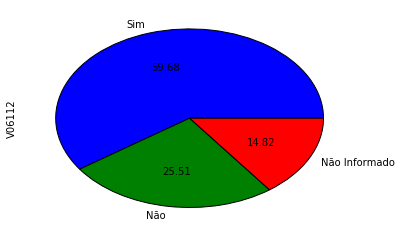

In [44]:
e = dados.V06112.value_counts(normalize = 1)
e.plot(kind='pie',  legend=False, autopct="%0.2f")

__Agora para 2015:__

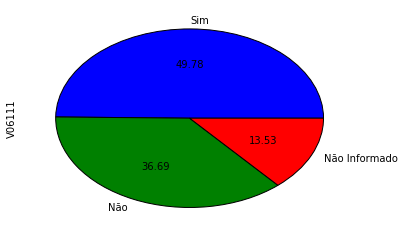

In [45]:
f = dados2.V06111.value_counts(normalize = 1)
f.plot(kind='pie',  legend=False, autopct="%0.2f")

# Renomeando colunas:

In [46]:
dados.columns = ['Renda11', 'Escolaridade11', 'Internet11', 'Celular11']

In [47]:
dados2.columns = ['Renda15', 'Escolaridade15', 'Internet15', 'Celular15']

In [48]:
dados.head()

,Renda11,Escolaridade11,Internet11,Celular11
0,0.0,Não Informado,Não,Sim
1,NaN,"Ensino Superior, Mestrando ou Doutorando",Sim,Sim
2,NaN,Ensino Médio em tempo regular,Sim,Não
3,NaN,Ensino Fundamental I em tempo regular,Não Informado,Não Informado
4,2800.0,Não Informado,Não,Sim


In [49]:
dados2.head()

,Renda15,Escolaridade15,Internet15,Celular15
0,800.0,Não Informado,Sim,Sim
1,1150.0,Não Informado,Sim,Sim
2,880.0,"Ensino Superior, Mestrando ou Doutorando",Sim,Sim
3,3000.0,Não Informado,Sim,Sim
4,NaN,Ensino Fundamental I em tempo regular,Sim,Sim


# __Para Renda:__

In [50]:
dados.Renda11.describe()

count    157339.000000
mean       1233.785705
std        1836.310814
min           0.000000
25%         545.000000
50%         750.000000
75%        1200.000000
max       45000.000000
Name: Renda11, dtype: float64

##### Máximo e máximo valor está explícito pelo describe()

#### Criando faixas de Renda:

In [51]:
step = ((2*(stats.percentileofscore(dados.Renda11, 75) - stats.percentileofscore(dados.Renda11, 25)))/(358918**(1/3)))*1000
print(step)

11.173348152615542


In [52]:
step2 = ((2*(stats.percentileofscore(dados2.Renda15, 75) - stats.percentileofscore(dados2.Renda15, 25)))/(358918**(1/3)))*1000
print(step)

11.173348152615542


Tomando uso do `.fillna`

In [53]:
dados.Renda11.fillna(value = 'Não Informado')
print('')

In [54]:
dados2.Renda15.fillna(value = 'Não Informado')
print('')

In [55]:
faixa = np.arange(0, 50000, 1500)
pd.cut(dados.Renda11, bins=np.r_[faixa, np.inf], right=False)
pd.cut(dados2.Renda15, bins=np.r_[faixa, np.inf], right=False)
print('')

__Usando__ `boxplot` __e__ `histograma` __para checar a base de dados em 2011, depois para 2015:__

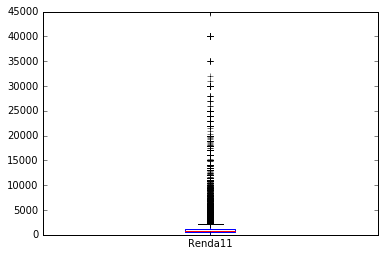

In [56]:
dados.Renda11.plot.box()

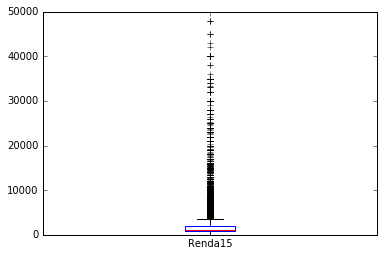

In [57]:
dados2.Renda15.plot.box()

### Vamos subdividir o grupo de renda em grupos menores usando o método `loc`

In [59]:
faixa1 = np.arange(0, 1000, 50)
grupo1_renda11 = dados.Renda11.loc[(dados.Renda11 > 1) & (dados.Renda11 < 1000)]
grupo1_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 1) & (dados2.Renda15 < 1000)]

In [60]:
faixa2 = np.arange(1000, 2000, 50)
grupo2_renda11 = dados.Renda11.loc[(dados.Renda11 > 1000) & (dados.Renda11 <= 2000)]
grupo2_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 1000) & (dados2.Renda15 <= 2000)]

In [61]:
faixa3 = np.arange(2000, 3000, 50)
grupo3_renda11 = dados.Renda11.loc[(dados.Renda11 > 2000) & (dados.Renda11 <= 3000)]
grupo3_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 2000) & (dados2.Renda15 <= 3000)]

In [62]:
faixa4 = np.arange(3000, 4000, 50)
grupo4_renda11 = dados.Renda11.loc[(dados.Renda11 > 3000) & (dados.Renda11 <= 4000)]
grupo4_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 3000) & (dados2.Renda15 <= 4000)]

In [63]:
faixa5 = np.arange(4000, 5000, 50)
grupo5_renda11 = dados.Renda11.loc[(dados.Renda11 > 4000) & (dados.Renda11 <= 5000)]
grupo5_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 4000) & (dados2.Renda15 <= 5000)]

In [64]:
faixa6 = np.arange(5000, 6000, 50)
grupo6_renda11 = dados.Renda11.loc[(dados.Renda11 > 5000) & (dados.Renda11 <= 6000)]
grupo6_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 5000) & (dados2.Renda15 <= 6000)]

In [65]:
faixa7 = np.arange(6000, 7000, 50)
grupo7_renda11 = dados.Renda11.loc[(dados.Renda11 > 6000) & (dados.Renda11 <= 7000)]
grupo7_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 6000) & (dados2.Renda15 <= 7000)]

In [66]:
faixa8 = np.arange(7000, 8000, 50)
grupo8_renda11 = dados.Renda11.loc[(dados.Renda11 > 7000) & (dados.Renda11 <= 8000)]
grupo8_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 7000) & (dados2.Renda15 <= 8000)]

In [67]:
faixa9 = np.arange(8000, 9000, 50)
grupo9_renda11 = dados.Renda11.loc[(dados.Renda11 > 8000) & (dados.Renda11 <= 9000)]
grupo9_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 8000) & (dados2.Renda15 <= 9000)]

In [68]:
faixa10 = np.arange(9000, 10000, 50)
grupo10_renda11 = dados.Renda11.loc[(dados.Renda11 > 9000) & (dados.Renda11 <= 10000)]
grupo10_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 9000) & (dados2.Renda15 <= 10000)]

In [69]:
faixaL = np.arange(10000, 30000, 500)
grupoL_renda11 = dados.Renda11.loc[(dados.Renda11 > 10000) & (dados.Renda11 <= 30000)]
grupoL_renda15 = dados2.Renda15.loc[(dados2.Renda15 > 10000) & (dados2.Renda15 <= 30000)]

# Exibição de cada grupo:

Grupo 1:

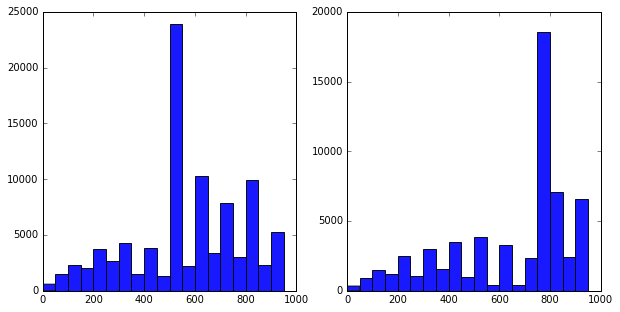

In [70]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo1_renda11, bins=faixa1, alpha=0.9)
plt.subplot(122)
plt.hist(grupo1_renda15, bins=faixa1, alpha=0.9)
plt.show()

Grupo 2:

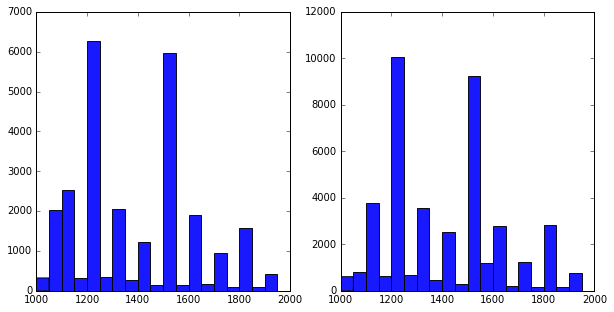

In [71]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo2_renda11, bins=faixa2, alpha=0.9)
plt.subplot(122)
plt.hist(grupo2_renda15, bins=faixa2, alpha=0.9)
plt.show()

Grupo 3:

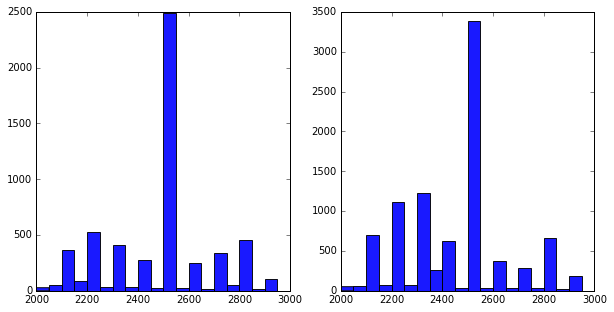

In [72]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo3_renda11, bins=faixa3, alpha=0.9)
plt.subplot(122)
plt.hist(grupo3_renda15, bins=faixa3, alpha=0.9)
plt.show()

Grupo 4:

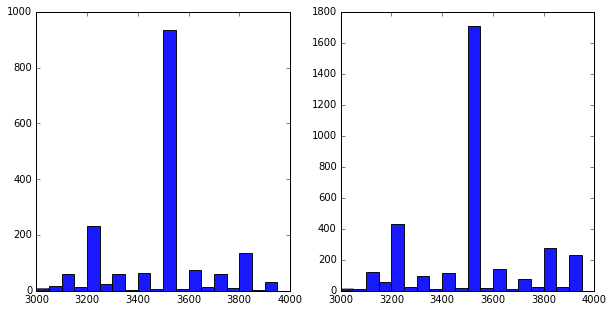

In [73]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo4_renda11, bins=faixa4, alpha=0.9)
plt.subplot(122)
plt.hist(grupo4_renda15, bins=faixa4, alpha=0.9)
plt.show()

Grupo 5:

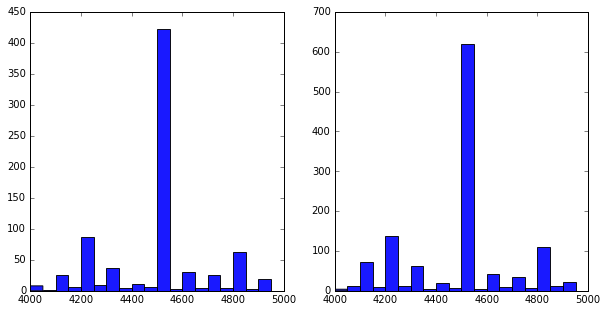

In [74]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo5_renda11, bins=faixa5, alpha=0.9)
plt.subplot(122)
plt.hist(grupo5_renda15, bins=faixa5, alpha=0.9)
plt.show()

Grupo 6:

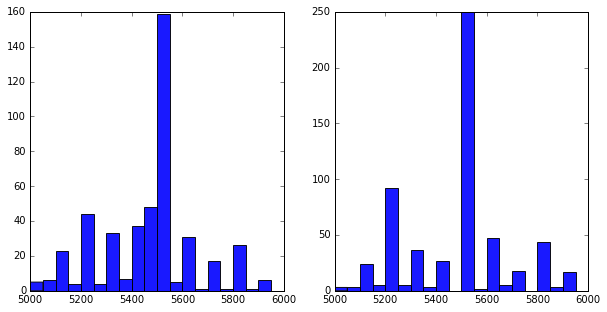

In [75]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo6_renda11, bins=faixa6, alpha=0.9)
plt.subplot(122)
plt.hist(grupo6_renda15, bins=faixa6, alpha=0.9)
plt.show()

Grupo 7:

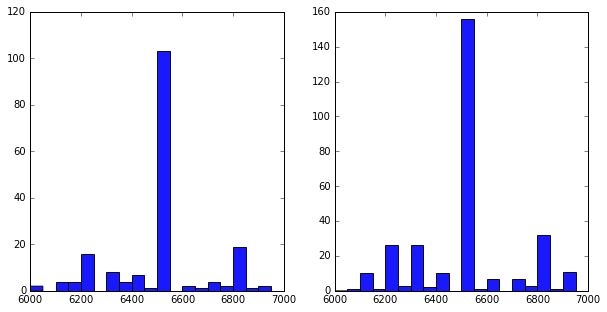

In [76]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo7_renda11, bins=faixa7, alpha=0.9)
plt.subplot(122)
plt.hist(grupo7_renda15, bins=faixa7, alpha=0.9)
plt.show()

Grupo 8:

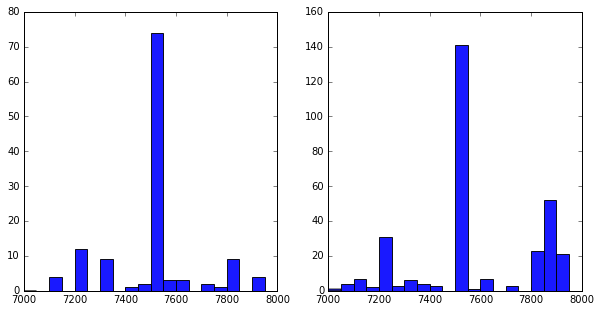

In [77]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo8_renda11, bins=faixa8, alpha=0.9)
plt.subplot(122)
plt.hist(grupo8_renda15, bins=faixa8, alpha=0.9)
plt.show()

Grupo 9:

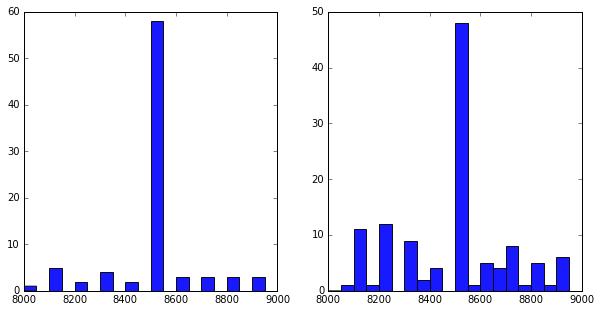

In [78]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo9_renda11, bins=faixa9, alpha=0.9)
plt.subplot(122)
plt.hist(grupo9_renda15, bins=faixa9, alpha=0.9)
plt.show()

Grupo 10:

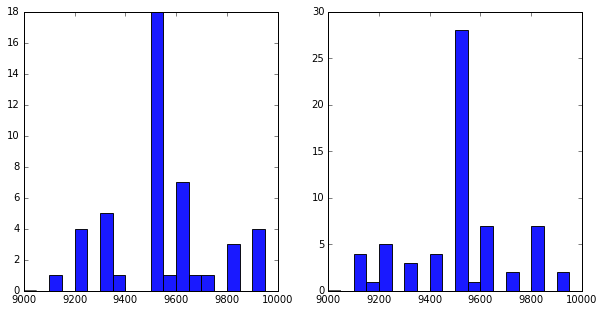

In [79]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupo10_renda11, bins=faixa10, alpha=0.9)
plt.subplot(122)
plt.hist(grupo10_renda15, bins=faixa10, alpha=0.9)
plt.show()

Grupo Large:

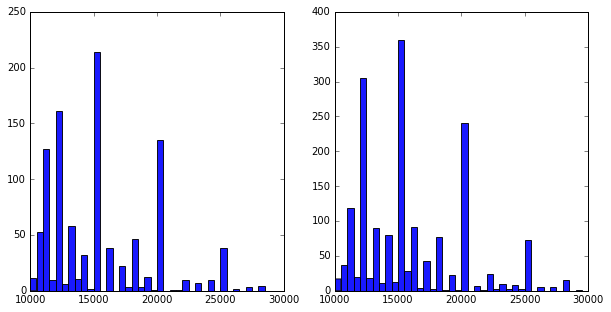

In [80]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(grupoL_renda11, bins=faixaL, alpha=0.9)
plt.subplot(122)
plt.hist(grupoL_renda15, bins=faixaL, alpha=0.9)
plt.show()

Denota-se que existem muitos outliers que estão atrapalhando

# __ Realizando Crosstabs: __

In [81]:
escolaridade_internet = pd.crosstab(dados.Escolaridade11, dados.Internet11, normalize = True)*100
escolaridade_internet

Internet11,Não,Não Informado,Sim
Escolaridade11,,,
Em alfabetização,0.011423,2.469638,0.004179
Ensino Fundamental I em tempo regular,4.181445,5.622717,6.567499
Ensino Médio em tempo regular,0.754209,0.000000,3.805037
"Ensino Superior, Mestrando ou Doutorando",0.071047,0.000000,3.527258
Jovens e Adultos cursando Ensino Médio,0.114789,0.000000,0.173298
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,0.379473,0.000000,0.155188
Não Informado,40.150842,6.725473,25.199279
Pré-Vestibulando,0.005851,0.000000,0.081355


In [82]:
escolaridade_celular = pd.crosstab(dados.Escolaridade11, dados.Celular11, normalize = True)*100
escolaridade_celular

Celular11,Não,Não Informado,Sim
Escolaridade11,,,
Em alfabetização,0.013931,2.469638,0.001672
Ensino Fundamental I em tempo regular,6.000240,5.622717,4.748704
Ensino Médio em tempo regular,0.945339,0.000000,3.613907
"Ensino Superior, Mestrando ou Doutorando",0.104480,0.000000,3.493825
Jovens e Adultos cursando Ensino Médio,0.043185,0.000000,0.244902
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,0.213697,0.000000,0.320964
Não Informado,18.181261,6.725473,47.168860
Pré-Vestibulando,0.003343,0.000000,0.083863


In [83]:
escolaridade_celular15 = pd.crosstab(dados2.Escolaridade15, dados2.Celular15, normalize = True)*100
escolaridade_celular15

Celular15,Não,Não Informado,Sim
Escolaridade15,,,
Em alfabetização,0.004203,2.053213,0.001401
Ensino Fundamental I em tempo regular,4.065239,5.331686,5.173100
Ensino Médio em tempo regular,0.507980,0.000000,3.859861
"Ensino Superior, Mestrando ou Doutorando",0.055757,0.000000,3.897687
Jovens e Adultos cursando Ensino Médio,0.022415,0.000000,0.244043
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,0.105070,0.000000,0.289434
Não Informado,13.494385,6.149553,54.704626
Pré-Vestibulando,0.000560,0.000000,0.039787


In [84]:
escolaridade_internet15 = pd.crosstab(dados2.Escolaridade15, dados2.Internet15, normalize = True)*100
escolaridade_internet15

Internet15,Não,Não Informado,Sim
Escolaridade15,,,
Em alfabetização,0.003923,2.053213,0.001681
Ensino Fundamental I em tempo regular,2.928238,5.331686,6.310100
Ensino Médio em tempo regular,0.509941,0.000000,3.857900
"Ensino Superior, Mestrando ou Doutorando",0.071448,0.000000,3.881996
Jovens e Adultos cursando Ensino Médio,0.063883,0.000000,0.202575
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,0.200054,0.000000,0.194450
Não Informado,32.907449,6.149553,35.291563
Pré-Vestibulando,0.000560,0.000000,0.039787


In [85]:
#escolaridade_celular.plot(kind = 'bar', normed = 1)
#escolaridade_celular15.plot(kind = 'bar', normed = 1)


In [86]:
renda1_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo1_renda11)
renda1_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo1_renda15)
renda1_escolaridade11

Renda11,3.0,4.0,5.0,6.0,7.0,8.0,10.0,12.0,14.0,15.0,...,990.0,991.0,992.0,993.0,994.0,995.0,996.0,997.0,998.0,999.0
Escolaridade11,,,,,,,,,,,,,,,,,,,,,
Ensino Fundamental I em tempo regular,0,0,1,0,0,0,2,0,0,3,...,0,0,0,0,1,0,0,0,0,0
Ensino Médio em tempo regular,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
"Ensino Superior, Mestrando ou Doutorando",0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,1,1,0,0,0,0
Jovens e Adultos cursando Ensino Médio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jovens e Adultos em alfabetização ou cursando Ensino Fundamental,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Não Informado,1,2,2,1,1,1,10,6,1,18,...,53,1,2,2,3,4,2,2,9,19
Pré-Vestibulando,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
renda2_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo2_renda11)
renda2_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo2_renda15)


In [88]:
renda3_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo3_renda11)
renda3_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo3_renda15)


In [89]:
renda4_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo4_renda11)
renda4_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo4_renda15)


In [90]:
renda5_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo5_renda11)
renda5_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo5_renda15)



In [91]:
renda6_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo6_renda11)
renda6_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo6_renda15)



In [92]:
renda7_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo7_renda11)
renda7_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo7_renda15)



In [93]:
renda8_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo8_renda11)
renda8_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo8_renda15)


In [94]:
renda9_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo9_renda11)
renda9_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo9_renda15)


In [95]:
renda10_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupo10_renda11)
renda10_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupo10_renda15)


In [96]:
rendaL_escolaridade11 = pd.crosstab(dados.Escolaridade11, grupoL_renda11)
rendaL_escolaridade15 = pd.crosstab(dados2.Escolaridade15, grupoL_renda15)

In [102]:
plt.figure(figsize = (200, 150))

plt.subplot(4,3,1)
plt.hist(grupo1_renda11, bins=faixa10, alpha=0.9)

plt.subplot(4,3,2)
plt.hist(grupo2_renda15, bins=faixa10, alpha=0.9)

plt.subplot(4,3,3)
plt.hist(grupo3_renda11, bins=faixa10, alpha=0.9)

plt.subplot(4,3,4)
plt.hist(grupo4_renda15, bins=faixa10, alpha=0.9)

plt.subplot(4,3,5)
plt.hist(grupo5_renda11, bins=faixa10, alpha=0.9)

plt.subplot(4,3,6)
plt.hist(grupo6_renda15, bins=faixa10, alpha=0.9)

plt.subplot(4,3,7)
plt.hist(grupo7_renda11, bins=faixa10, alpha=0.9)

plt.subplot(4,3,8)
plt.hist(grupo8_renda15, bins=faixa10, alpha=0.9)

plt.subplot(4,3,9)
plt.hist(grupo9_renda11, bins=faixa10, alpha=0.9)

plt.subplot(4,3,10)
plt.hist(grupo10_renda15, bins=faixa10, alpha=0.9)

plt.subplot(4,3,11)
plt.hist(grupoL_renda15, bins=faixa10, alpha=0.9)

plt.show()